In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split


### 1. Data Preparation
    - Load the Fashion-MNIST dataset.
    - Preprocess the data (e.g., normalization, reshaping, etc.).
    - Split the dataset into training, validation, and testing sets.

In [10]:

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data (normalization, reshaping, etc.)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Split the dataset into training, validation, and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify the shape of the datasets
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels: {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")


Training data shape: (48000, 28, 28, 1), Labels: (48000,)
Validation data shape: (12000, 28, 28, 1), Labels: (12000,)
Testing data shape: (10000, 28, 28, 1), Labels: (10000,)


### 2. Model Architecture
    - Define the architecture of the CNN model.
    - Choose appropriate activation functions and loss functions.
    - Select an optimization algorithm (e.g., Adam, SGD, etc.).

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the architecture of the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### 3. Model Training
    - Train the model on the training set.
    - Use the validation set to monitor the performance and prevent overfitting.
    - Tune hyperparameters (e.g., learning rate, batch size, etc.) as needed.


Epoch 1/10
1500/1500 [==============================] - 52s 33ms/step - loss: 0.5344 - accuracy: 0.8041 - val_loss: 0.4130 - val_accuracy: 0.8497
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3421 - accuracy: 0.8747 - val_loss: 0.3438 - val_accuracy: 0.8758
Epoch 3/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2886 - accuracy: 0.8935 - val_loss: 0.2990 - val_accuracy: 0.8922
Epoch 4/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2556 - accuracy: 0.9055 - val_loss: 0.2828 - val_accuracy: 0.8953
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2334 - accuracy: 0.9145 - val_loss: 0.2791 - val_accuracy: 0.8976
Epoch 6/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2122 - accuracy: 0.9223 - val_loss: 0.2768 - val_accuracy: 0.8965
Epoch 7/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.1928 - accuracy: 0.9290 - val_loss: 0.2605 -

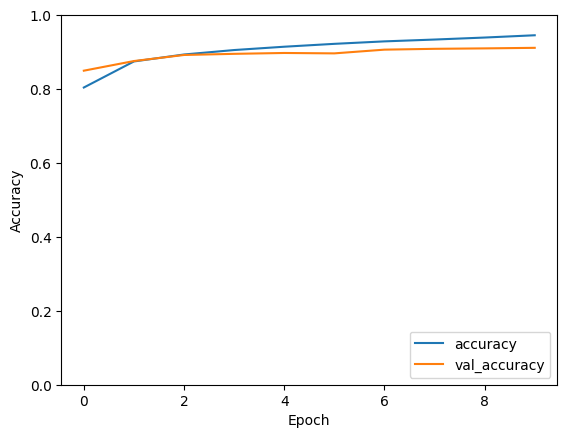

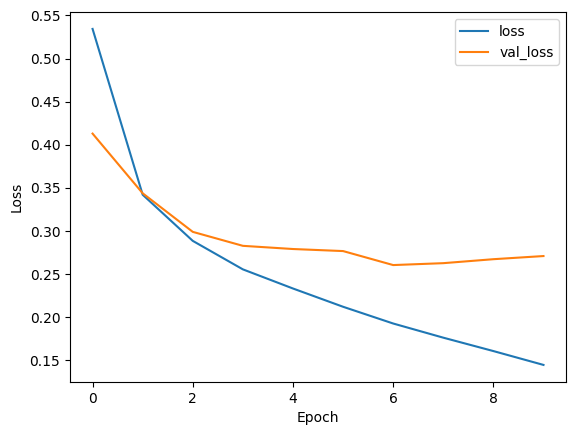

In [13]:
import tensorflow as tf

# Define your CNN model architecture
model = tf.keras.Sequential([
    # Add your convolutional layers, pooling layers, and fully connected layers here
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training set
# history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


# Plot training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


### 4. Model Evaluation
    - Evaluate the trained model on the test set.
    - Calculate relevant metrics such as accuracy, precision, recall, and F1-score.
    - Visualize the results (e.g., confusion matrix, classification report, etc.).


313/313 [==============================] - 3s 9ms/step
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.84      0.86      1000
           3       0.91      0.90      0.91      1000
           4       0.81      0.91      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.74      0.73      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



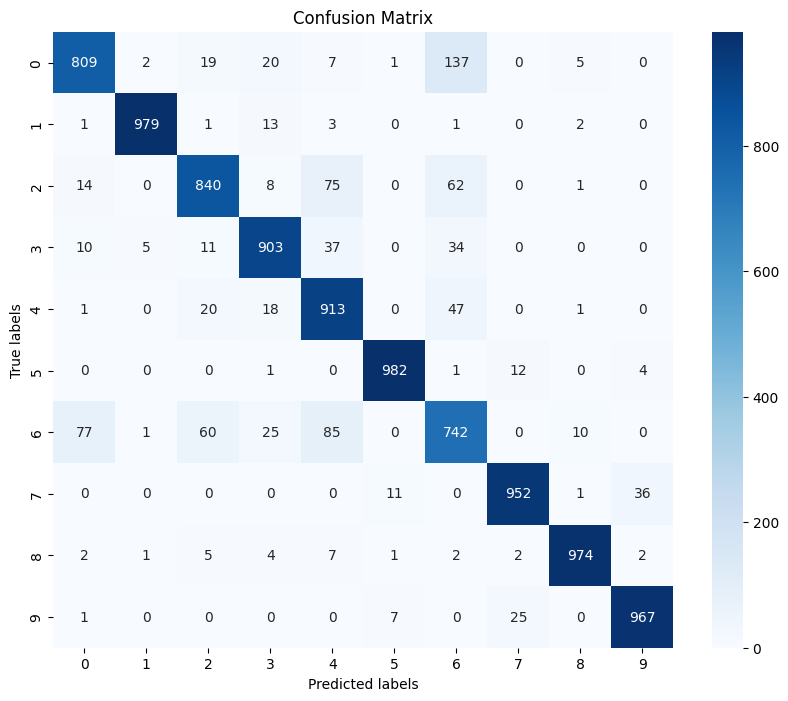

In [14]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a trained model saved as `model`
# and test data and labels as `X_test` and `y_test`

# Load the model
# model = tf.keras.models.load_model('path_to_saved_model')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate relevant metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Save Models

In [32]:
from tensorflow.keras.models import load_model, save_model

In [33]:
# Save the trained model
save_model(model, '../models/model.h5')

C:\Users\admin\AppData\Local\Temp\ipykernel_6220\2237819140.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '../models/model.h5')


In [34]:
# Later, you can load the saved model
loaded_model = load_model('../models/model.h5')

In [35]:
loaded_model

### Prediction

In [36]:

# Sample input data (replace this with your actual input data)
input_data = np.random.rand(1, 28, 28, 1)  # Example input: 28x28 grayscale image

# Preprocess the input data (if necessary)
# No preprocessing required for this example

# Pass the preprocessed input data through the model
predictions = loaded_model.predict(input_data)

# Interpret the output
# For example, if you're doing classification:
predicted_class = np.argmax(predictions)
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 1s 561ms/step
Predicted class: 6


### 5. Model Deployment (Optional)
    - Save the trained model for future use.
    - Deploy the model for inference on new data (e.g., using TensorFlow Serving, TensorFlow Lite, etc.).